In [598]:
import pandas as pd
import matplotlib.pyplot as plt
import os

#A.----------------------------------loading the datasets----------------------------------------------------
 
base_path="Desktop/SkyGeniAssignment/data/"
file_names={'finance':'financial_information.csv', 'client': 'industry_client_details.csv','payment':'payment_information.csv','subscription':'subscription_information.csv'}
dfs={}
for name,filename in file_names.items():
    full_path=os.path.join(base_path,filename)
    dfs[name]=pd.read_csv(full_path)
finance = dfs['finance']
client = dfs['client']
payment = dfs['payment']
subscription = dfs['subscription']

#B.---------------------------------------------Data Preproccessing-----------------------------------------
#checking the datatypes, row and columns, and also if any null values are present or not
#storing the data frames in a dictionary for easy access
dfs2={'finance': finance,'client': client,'payment': payment,'subscription': subscription}
for i,df in dfs2.items():
    print(f"\n========================{i.upper()}==========================")
    df.info();
    print(df.isnull().sum())
    
#As there are no null values,i will not update those.
#But if there exists null or nan values then i would use 
finance = finance.drop(finance.columns[0], axis=1)#as here the first column is unnecessary,drop column at index 1
dfs3 = {'finance': finance,'client': client,'payment': payment,'subscription': subscription}
for i,df in dfs3.items():
    df.dropna()#it will drop rows with missing values
    df.fillna(0)#it will fill missing values with 0
    df = df.drop_duplicates()#finance = finance.reset_index(drop=True)#it will reset the indexs if rows were dropped



========================FINANCE==========================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       21 non-null     int64  
 1   start_date       21 non-null     object 
 2   end_date         21 non-null     object 
 3   inflation_rate   21 non-null     float64
 4   gdp_growth_rate  21 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 972.0+ bytes
Unnamed: 0         0
start_date         0
end_date           0
inflation_rate     0
gdp_growth_rate    0
dtype: int64

========================CLIENT==========================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   client_id     100 non-null    int64 
 1   company_size  100 non-null    object
 2 

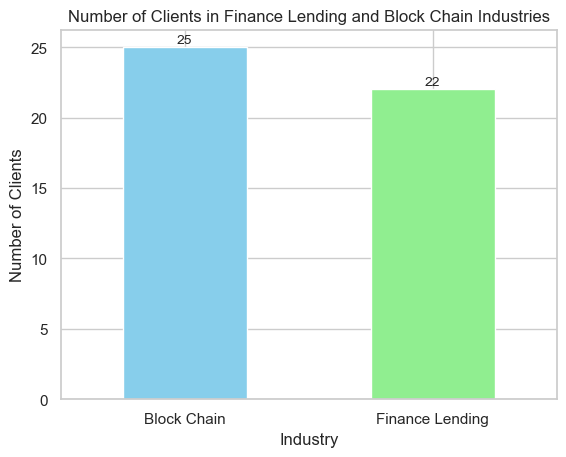

In [602]:
#Q1.How many finance lending and blockchain clients does the organization have?
df=client[client['industry'].isin(["Finance Lending","Block Chain"])]
industry_counts = df['industry'].value_counts()
# Visualization
industry_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Number of Clients in Finance Lending and Block Chain Industries')
plt.xlabel('Industry')
plt.ylabel('Number of Clients')
plt.xticks(rotation=0)
#here 'i' is the index of the bar and 'v' is value #The enumerate() function is used in Python to iterate over a sequence (like a list, tuple, or Pandas Series)
#v+0.1 adds little space above the bar #ha: horizontally aligns, va: vertically aligns
for i, v in enumerate(industry_counts):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)
plt.show()

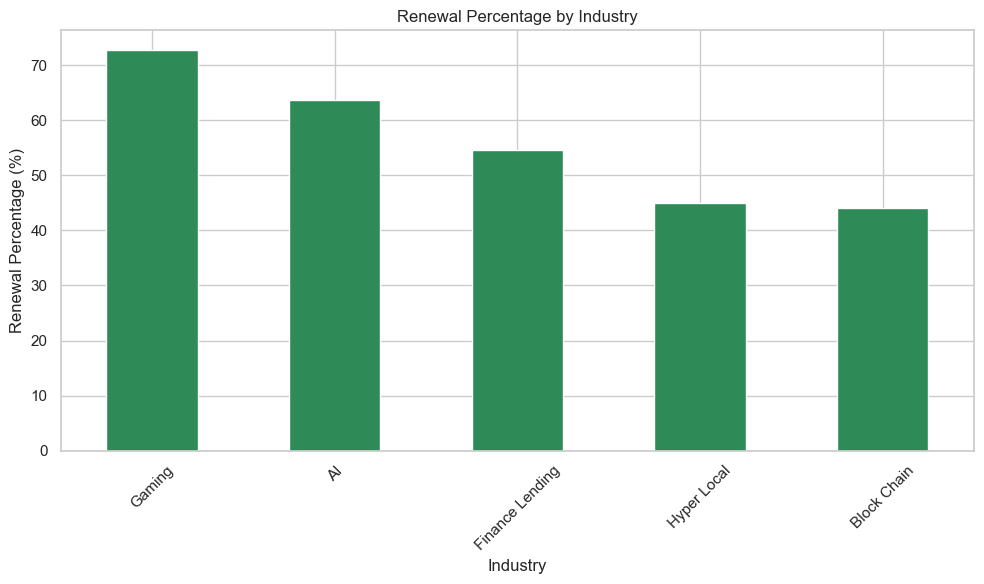

In [604]:
#Q2.Which industry in the organization has the highest renewal rate?
import matplotlib.pyplot as plt
#The industry column is present in the client table, but the renewed column is present in the subscription table
# So I have done an inner join between client and subscription
#The common column is client_id
client_subscription=pd.merge(client,subscription,on="client_id",how='inner')
#Now i have the new data frame client_subscription,in which i will fetch renewed column=true
total_industry=client_subscription['industry'].value_counts()
total_industry
renwed_df=client_subscription[client_subscription['industry']==True]
#Count renewed subscriptions by industry
renewed_by_industry = renewed_df['industry'].value_counts()
#renewed_by_industry
#Calculate renewal percentage for each industry
renewal_percentage = (renewed_by_industry / total_by_industry) * 100
renewal_percentage = renewal_percentage.fillna(0).sort_values(ascending=False)
renewal_percentage
# print("Renewal Percentage by Industry:")
# print(renewal_percentage)

# Step 7: Plot the renewal percentage as a bar chart
renewal_percentage.plot(kind='bar', figsize=(10, 6), color='seagreen')
plt.title('Renewal Percentage by Industry')
plt.xlabel('Industry')
plt.ylabel('Renewal Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The Average inflation rate when their subscriptions were renewed: 3.98%


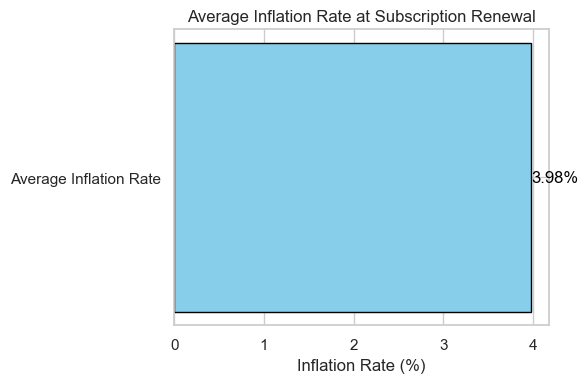

In [606]:
#Q3.What was the average inflation rate when their subscriptions were renewed?
#Here i need finance and subscription data frame.
#at first i will look into renewed = true columns
sub_renew=subscription[subscription['renewed']==True].copy()
#Cross-join with finance data to find matching date ranges
finance_subscription=sub_renew.merge(finance,how='cross')
match_dates=finance_subscription[(finance_subscription['start_date_y']<=finance_subscription['start_date_x']) & (finance_subscription['end_date_y']<=finance_subscription['end_date_x'])]
match_dates
avg_inflation=matched['inflation_rate'].mean()
print(f"The Average inflation rate when their subscriptions were renewed: {avg_inflation:.2f}%")

#visualization
#Create a bar chart to highlight the average inflation rate
plt.figure(figsize=(6, 4))
plt.barh(['Average Inflation Rate'], [avg_inflation], color='skyblue', edgecolor='black')
plt.xlabel('Inflation Rate (%)')
plt.title('Average Inflation Rate at Subscription Renewal')
plt.text(avg_inflation, 0, f'{avg_inflation:.2f}%', va='center', ha='left', fontsize=12, color='black')
plt.tight_layout()
plt.show()

    year payment_method  amount_paid
0   2018  Bank Transfer       281.65
1   2018          Check       216.60
2   2018    Credit Card       229.15
3   2019  Bank Transfer       184.20
4   2019          Check       410.20
5   2019    Credit Card       401.90
6   2020  Bank Transfer       225.10
7   2020          Check       413.10
8   2020    Credit Card       285.25
9   2021  Bank Transfer       255.30
10  2021          Check       435.10
11  2021    Credit Card       208.70
12  2022  Bank Transfer       196.50
13  2022          Check       275.50
14  2022    Credit Card       326.20


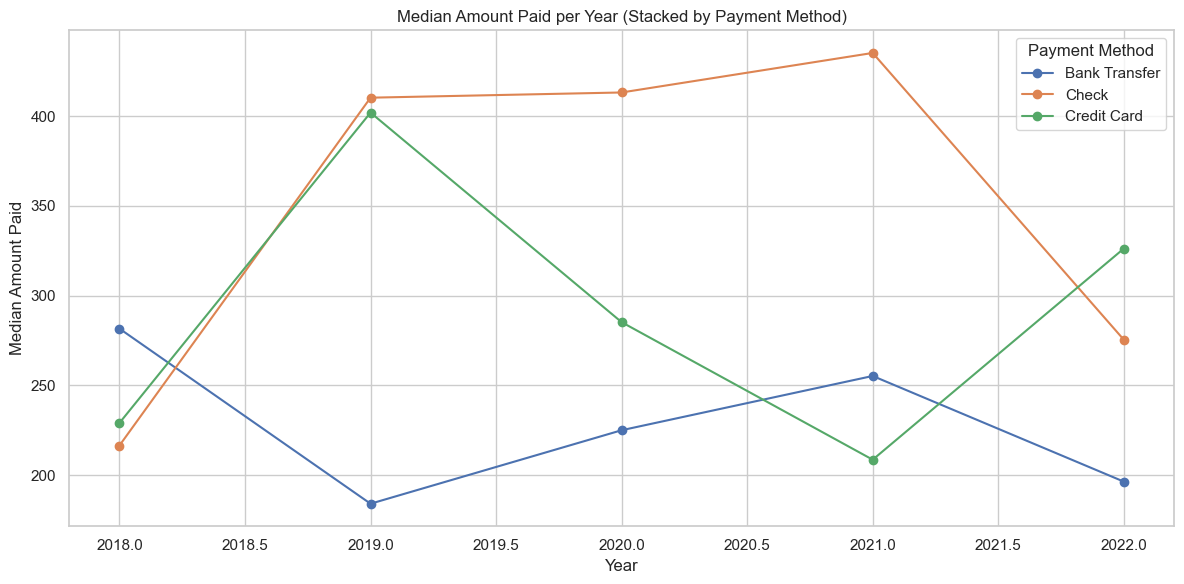

In [608]:
#Q4.What is the median amount paid each year for all payment methods? 

#I am converting the payment_date into datetime format to extract the year easily
payment['payment_date'] = pd.to_datetime(payment['payment_date'])
payment['year']=payment['payment_date'].dt.year
#Group by year and payment_method to calculate the median
median_payments = payment.groupby(['year', 'payment_method'])['amount_paid'].median().reset_index()
print(median_payments)

#I have used Pivot to sparate the data of each payment method
pivot_table = median_payments.pivot(index='year', columns='payment_method', values='amount_paid')

#plot using matplotlib
plt.figure(figsize=(12, 6))
# i am plotting each line manually for each payment method
for method in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[method], marker='o', label=method)
plt.title("Median Amount Paid per Year (Stacked by Payment Method)")
plt.ylabel("Median Amount Paid")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.legend(title="Payment Method")
plt.tight_layout()

# Step 4: Show the plot
plt.show()
